<a href="https://colab.research.google.com/github/alicia0408/Proyectos_Machine_Learning01/blob/master/Copia_de_Proyecto_6_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns;sns.set()                           # librerias a usar
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats import norm
from PIL import Image
%matplotlib inline 
import matplotlib.ticker as ticker
import itertools
import seaborn as sns; sns.set()

In [0]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
cups = pd.read_csv('WorldCups.csv')

##1) Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


## Dataframe Matches

In [0]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


## Exploración de datos


In [0]:
#Exploración de datos 'WorldCupMatches.csv'
print(f'Hay {matches.shape[0]} observaciones y {matches.shape[1]} características')




Hay 4572 observaciones y 20 características


In [0]:
matches.columns.tolist()

['Year',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials']

In [0]:
matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [0]:
matches.nunique()

Year                     20
Datetime                602
Stage                    23
Stadium                 181
City                    151
Home Team Name           78
Home Team Goals          11
Away Team Goals           7
Away Team Name           83
Win conditions           43
Attendance              622
Half-time Home Goals      7
Half-time Away Goals      6
Referee                 366
Assistant 1             387
Assistant 2             408
RoundID                 101
MatchID                 836
Home Team Initials       77
Away Team Initials       82
dtype: int64

In [0]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

In [0]:
categorical = matches.dtypes[matches.dtypes == "object"].index
matches[categorical].describe()

,Datetime,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
count,852,852,852,852,852,852,852,852,852,852,852,852
unique,602,23,181,151,78,83,43,366,387,408,77,82
top,27 May 1934 - 16:30,Round of 16,Estadio Azteca,Mexico City,Brazil,Mexico,,Ravshan IRMATOV (UZB),HERMANS Peter (BEL),KOCHKAROV Bakhadyr (KGZ),BRA,MEX
freq,8,72,19,23,82,38,787,10,7,10,82,38


In [0]:
matches.sample(n=2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
199,1966.0,30 Jul 1966 - 15:00,Final,Wembley Stadium,London,England,4.0,2.0,Germany FR,England win after extra time,96924.0,0.0,0.0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478.0,1633.0,ENG,FRG
3667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


## Se identifica los valores faltantes por columna

In [0]:
#Crea una nueva función:
def num_missing(x):
    return sum(x.isnull())

#Aplicándola por columna:
print("Valores faltantes por columna:")
## Comprueba cuántos faltan por columna y luego verifica cuáles tienen los valores faltantes
print(matches.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20)) 
#axis=0 Define que la función se aplica en cada columna.

Valores faltantes por columna:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64


##Cantidad de nulos de cada dataframe por columna

In [0]:
matches.isnull().sum()



Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

## Tipos de datos o variables


In [0]:
# Se hace un dataframe con los tipos de dato presentes en la base
matches_tipo = pd.DataFrame(matches.dtypes)
matches_tipo.columns = ['Tipo de Dato']
# Se agrega la columna 'Variable' con los tipos de variables que corresponda
matches_tipo['Variable'] = ['Categorica','Continua','Nominal','Nominal','Nominal','Nominal','Discreta','Discreta','Nominal','Nominal','Discreta','Discreta','Discreta','Nominal','Nominal','Nominal','Discreta','Discreta','Nominal','Nominal']
matches_tipo.head(15)



,Tipo de Dato,Variable
Year,float64,Categorica
Datetime,object,Continua
Stage,object,Nominal
Stadium,object,Nominal
City,object,Nominal
Home Team Name,object,Nominal
Home Team Goals,float64,Discreta
Away Team Goals,float64,Discreta
Away Team Name,object,Nominal
Win conditions,object,Nominal


In [0]:

# Se separan la fecha y la hora de la columna 'Datetime'
matches_datetime = matches['Datetime'].str.split('-', expand=True)

# Se añaden dos nuevas columnas al df, una para fecha, y otra para hora
matches.insert(1,'Date',matches_datetime[0])
matches.insert(2,'Time',matches_datetime[1])

# Se elimina la columna 'Datetime'
matches = matches.drop(['Datetime'], axis=1)

# Para la columna 'Date', se cambia el tipo de dato a fecha
matches['Date'] = pd.to_datetime(matches['Date'])

# Para la columna 'Time' se cambia el tipo de dato a hora
matches['Time'] = pd.to_timedelta(matches['Time']+':00')

matches.head(5)


,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13,15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13,15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14,12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14,14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15,16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


##Limpieza de datos


In [0]:
# Se eliminan filas que sólo contengan datos nulos
matches = matches.dropna(axis = 0, how = 'all')

# Se eliminan filas que estén duplicadas
matches = matches.drop_duplicates(keep='last')

# Se reinicia el índice, luego de todos los cambios hechos a la base
matches = matches.reset_index()
matches = matches.drop(['index'], axis=1)
matches.shape

(836, 21)

##Analisis y tratamiento de valores nulos en la columna 'Attendance'


In [0]:
matches[matches['Attendance'].isnull()]

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
825,2014.0,2014-06-30,17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


##Reemplazar Attendance Vacío  en 'Matches' por el promedio de Attendance del estadio durante el año 2014


In [0]:
# Se calcula el promedio de attendance para el estadio durante 2014
promedio_attendance = int(matches[(matches['Stadium'] == 'Estadio Beira-Rio') & (matches['Year'] == 2014)]['Attendance'].mean())

# Se reemplaza el valor nulo de la columna, por el promedio obtenido
matches['Attendance'] = matches['Attendance'].fillna(promedio_attendance)
matches[matches['MatchID']==300186460.0]

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
825,2014.0,2014-06-30,17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,42976.0,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


##Verificación de la BBDD, de la existencia de valores nulos



In [0]:
matches_nulos = pd.DataFrame(matches.isna().sum())
matches_nulos.columns = ['Cant Nulos']
matches_nulos

,Cant Nulos
Year,0
Date,0
Time,0
Stage,0
Stadium,0
City,0
Home Team Name,0
Home Team Goals,0
Away Team Goals,0
Away Team Name,0


##DF Players
Analisis exploratorio

In [0]:
players.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [0]:
#Exploración de datos 'WorldCupPlayers.csv'
print(f'Hay {players.shape[0]} observaciones y {players.shape[1]} características')




Hay 37784 observaciones y 9 características


In [0]:
players.sample(n=2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
14377,293,1055,POL,PIECHNICZEK Antoni (POL),S,16,Grzegorz LATO,NaN,G58'
25277,43950100,43950001,SEN,METSU Bruno (FRA),S,2,DAF,NaN,NaN


In [0]:
players.columns.tolist()

['RoundID',
 'MatchID',
 'Team Initials',
 'Coach Name',
 'Line-up',
 'Shirt Number',
 'Player Name',
 'Position',
 'Event']

In [0]:
players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [0]:
players.nunique()

RoundID           101
MatchID           836
Team Initials      82
Coach Name        335
Line-up             2
Shirt Number       24
Player Name      7663
Position            3
Event            1893
dtype: int64

In [0]:
categorical = players.dtypes[players.dtypes == "object"].index
players[categorical].describe()

,Team Initials,Coach Name,Line-up,Player Name,Position,Event
count,37784,37784,37784,37784,4143,9069
unique,82,335,2,7663,3,1893
top,BRA,SCOLARI Luiz Felipe (BRA),N,RONALDO,GK,OH46'
freq,2403,575,19040,33,2441,247


In [0]:
#Crea una nueva función:
def num_missing(x):
    return sum(x.isnull())

#Aplicándola por columna:
print("Valores faltantes por columna:")
## Comprueba cuántos faltan por columna y luego verifica cuáles tienen los valores faltantes
print(players.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20)) 
#axis=0 Define que la función se aplica en cada columna.

Valores faltantes por columna:
Position    33641.0
Event       28715.0
dtype: float64


In [0]:
players_nulos = pd.DataFrame(players.isna().sum())
players_nulos.columns = ['Cant Nulos']
players_nulos

,Cant Nulos
RoundID,0
MatchID,0
Team Initials,0
Coach Name,0
Line-up,0
Shirt Number,0
Player Name,0
Position,33641
Event,28715


In [0]:
# Se hace un dataframe con los tipos de dato presentes en la base
players_tipo = pd.DataFrame(players.dtypes)
players_tipo.columns = ['Tipo de Dato']
# # Se agrega la columna 'Variable' con los tipos de variables que corresponda
players_tipo['Variable'] = ['Discreta','Discreta','Categórica','Nominal','Categórica','Cuantitativa/Cualitativa','Nominal','Categórica','Cuantitativa']
players_tipo

,Tipo de Dato,Variable
RoundID,int64,Discreta
MatchID,int64,Discreta
Team Initials,object,Categórica
Coach Name,object,Nominal
Line-up,object,Categórica
Shirt Number,int64,Cuantitativa/Cualitativa
Player Name,object,Nominal
Position,object,Categórica
Event,object,Cuantitativa


In [0]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Player Name      37784 non-null object
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


##Limpieza de datos





In [0]:
# Se borran las filas con duplicados
players = players.drop_duplicates(keep='last')
players.shape

(37048, 9)

In [0]:
# Visualizamos nulos en las columnas mencionadas
players[(players['Position'].isnull()) | players['Event'].isnull()].head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [0]:
# Al determinar que no influye la presencia de nulos en estas columnas
# se reemplazan por '-' (pueden ser reemplazadas por cualquier elemento, o por 0)
players = players.fillna('-')
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,-
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,-
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,-,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,-,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,-,-


#DF Cups

## analisis exploratorio

In [0]:
cups.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [0]:
cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [0]:
cups.columns.tolist()

['Year',
 'Country',
 'Winner',
 'Runners-Up',
 'Third',
 'Fourth',
 'GoalsScored',
 'QualifiedTeams',
 'MatchesPlayed',
 'Attendance']

In [0]:
#Exploración de datos 'WorldCups.csv'
print(f'Hay {cups.shape[0]} observaciones y {cups.shape[1]} características')




Hay 20 observaciones y 10 características


In [0]:
categorical = players.dtypes[players.dtypes == "object"].index
players[categorical].describe()

,Team Initials,Coach Name,Line-up,Player Name,Position,Event
count,37048,37048,37048,37048,37048,37048
unique,82,335,2,7663,4,1894
top,BRA,SCHOEN Helmut (FRG),N,RONALDO,-,-
freq,2311,550,18656,33,33030,28225


In [0]:
cups.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

In [0]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


In [0]:
cups.sample(n=2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439


In [0]:
cups['Third'].dtype

dtype('O')

In [0]:
# Encuentra el dtype, también conocido como tipo de datos, para una columna
cups['Runners-Up'].dtype

dtype('O')

In [0]:
#Crea una nueva función:
def num_missing(x):
    return sum(x.isnull())

#Aplicándola por columna:
print("Valores faltantes por columna:")
## Comprueba cuántos faltan por columna y luego verifica cuáles tienen los valores faltantes
print(cups.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20)) 
#axis=0 Define que la función se aplica en cada columna.

Valores faltantes por columna:
Series([], dtype: float64)


In [0]:
cups_nulos = pd.DataFrame(cups.isna().sum())
cups_nulos.columns = ['Cant Nulos']
cups_nulos

,Cant Nulos
Year,0
Country,0
Winner,0
Runners-Up,0
Third,0
Fourth,0
GoalsScored,0
QualifiedTeams,0
MatchesPlayed,0
Attendance,0


In [0]:
# Se hace un dataframe con los tipos de dato presentes en la base
cups_tipo = pd.DataFrame(cups.dtypes)
cups_tipo.columns = ['Tipo de Dato']
# # Se agrega la columna 'Variable' con los tipos de variables que corresponda
cups_tipo['Variable'] = ['Categorica','Categórica','Categórica','Categórica','Categórica','Categórica','Discreta','Discreta','Discreta','Discreta']
cups_tipo



,Tipo de Dato,Variable
Year,int64,Categorica
Country,object,Categórica
Winner,object,Categórica
Runners-Up,object,Categórica
Third,object,Categórica
Fourth,object,Categórica
GoalsScored,int64,Discreta
QualifiedTeams,int64,Discreta
MatchesPlayed,int64,Discreta
Attendance,object,Discreta


In [0]:
# Se suman las 'attendance' de la base matches para el año 2014
attendance_total = matches[matches['Year'] == 2014]['Attendance'].sum().round()
# Se eliminan los puntos de todos los valores de 'attendance'
cups['Attendance'] = cups.Attendance.str.replace('.', '')

# Se busca el valor de 'attendance' del año 2014, para ser reemplazado
attendance_2014 = cups.loc[cups['Year'] == 2014, 'Attendance'].values[0]

# Se reemplaza el valor antiguo por el promedio obtenido
cups.replace(attendance_2014, attendance_total, inplace= True)

# Finalmente se cambia el tipo de dato de la columna
cups['Attendance'] = cups.Attendance.astype('int64')
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


##Identificación de outliers

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

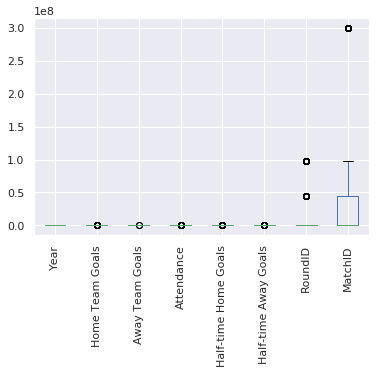

In [0]:
matches.boxplot()
plt.xticks(rotation=90)                                                         
#Se puede ver en un dataframe entero que hay  outliers
#pero es por el hecho de que no todos los indices
#se relacionan directamente por que algunos son categoricos.

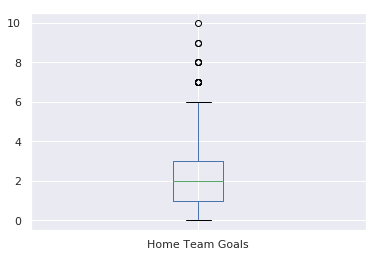

In [0]:
matches.boxplot(column='Home Team Goals', return_type='axes');                  
#No en todos los partidos se van a realizar 
#la misma cantidad de anotaciones.

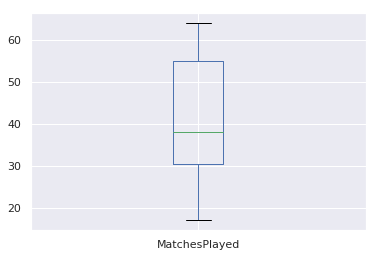

In [0]:
cups.boxplot(column= 'MatchesPlayed', return_type='axes');                       
#En el boxplot presenta una considerada inclinacion
#ya que en los primeros años de jugaban menos partidos
#por el hecho de que jugaban menos paises

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

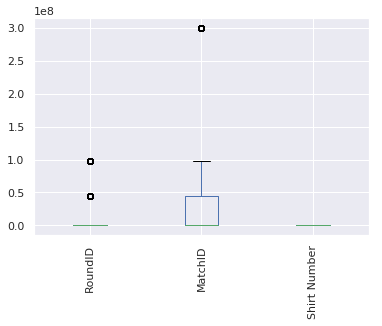

In [0]:
players.boxplot()
plt.xticks(rotation=90)                                                          
#Se muestra que MatchID tiene una cantidad de outliers 
#pero es por que es la identificacion de cada jugador 
#por partido jugado.

##3. Visualizaciones para el analisis pertinente

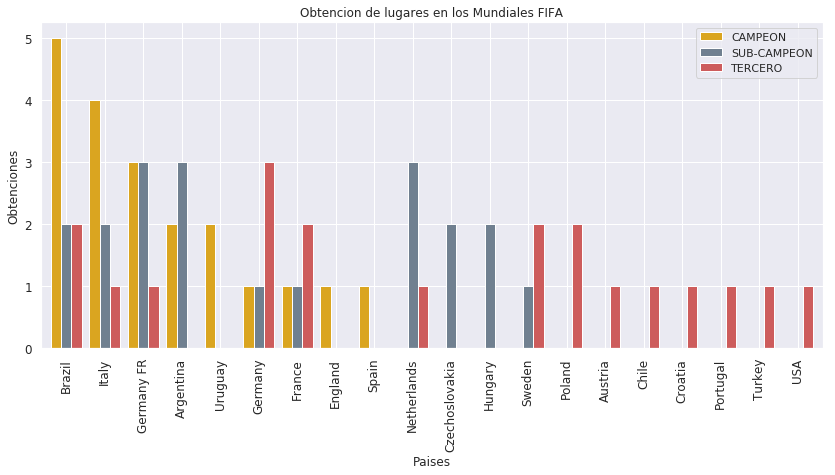

In [0]:
# Grafico "Podio"

# se guardan los 3 primeros lugares
camp = cups['Winner']
subc = cups['Runners-Up']
terc = cups['Third']

# se hace un conteo de valores para los primeros 3 lugares segun paises
camp_count = pd.DataFrame.from_dict(camp.value_counts())
subc_count = pd.DataFrame.from_dict(subc.value_counts())
terc_count = pd.DataFrame.from_dict(terc.value_counts())

# se crea un "podio" uniendo las variables con los lugares, ordenando los valores
# segun la cantidad de obtenciones en el podio y se reemplazan los valores nan por 0

podio = camp_count.join(subc_count, how='outer').join(terc_count, how='outer')
podio = podio.fillna(0)
podio.columns = ['CAMPEON', 'SUB-CAMPEON', 'TERCERO']
podio = podio.astype('int64')
podio = podio.sort_values(by=['CAMPEON', 'SUB-CAMPEON', 'TERCERO'], ascending=False)

# Grafico de la obtencion de titulos por paises, incluyendo subcampeonatos y tercer lugar.
podio.plot(y=['CAMPEON', 'SUB-CAMPEON', 'TERCERO'], kind="bar", 
                  color =['goldenrod','slategrey','indianred'], figsize=(14, 6), fontsize=12,
                 width=0.8, align='center', grid=True)
plt.xlabel('Paises')
plt.ylabel('Obtenciones')
plt.title('Obtencion de lugares en los Mundiales FIFA')
plt.show()


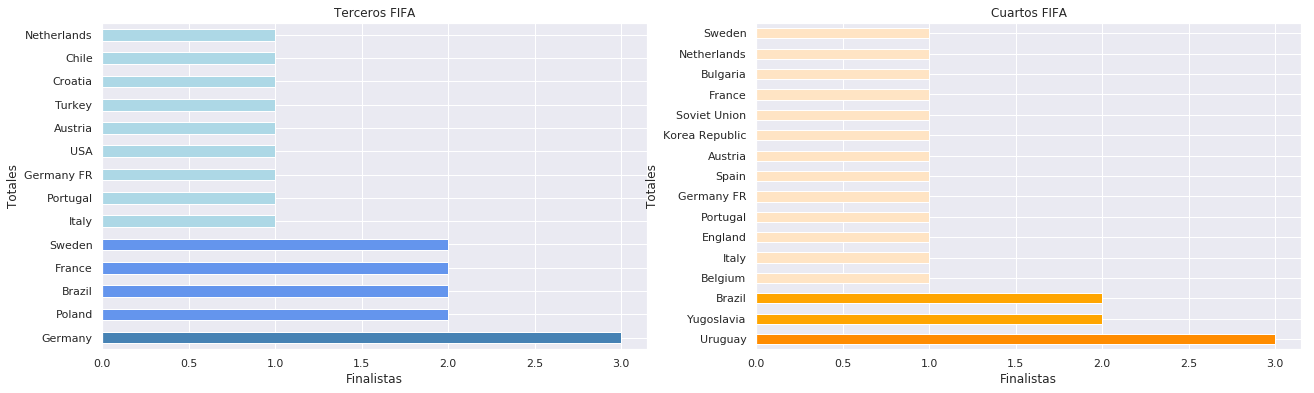

In [0]:
plt.figure(figsize= (6,6))

plt.subplot(1, 2, 1)
plt.title('Terceros FIFA')
plt.xlabel('Finalistas')
plt.ylabel('Totales')
cups['Third'].value_counts().plot(kind = 'barh', color=('steelblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','lightblue','lightblue','lightblue','lightblue','lightblue',
                                                        'lightblue','lightblue','lightblue','lightblue'));
plt.subplots_adjust(right=2.9)


plt.subplot(1, 2, 2)
plt.title('Cuartos FIFA')
plt.xlabel('Finalistas'),
plt.ylabel('Totales')
cups['Fourth'].value_counts().plot(kind = 'barh', color=('darkorange','orange','orange','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque',
                                                         'bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque','bisque'));
plt.show()




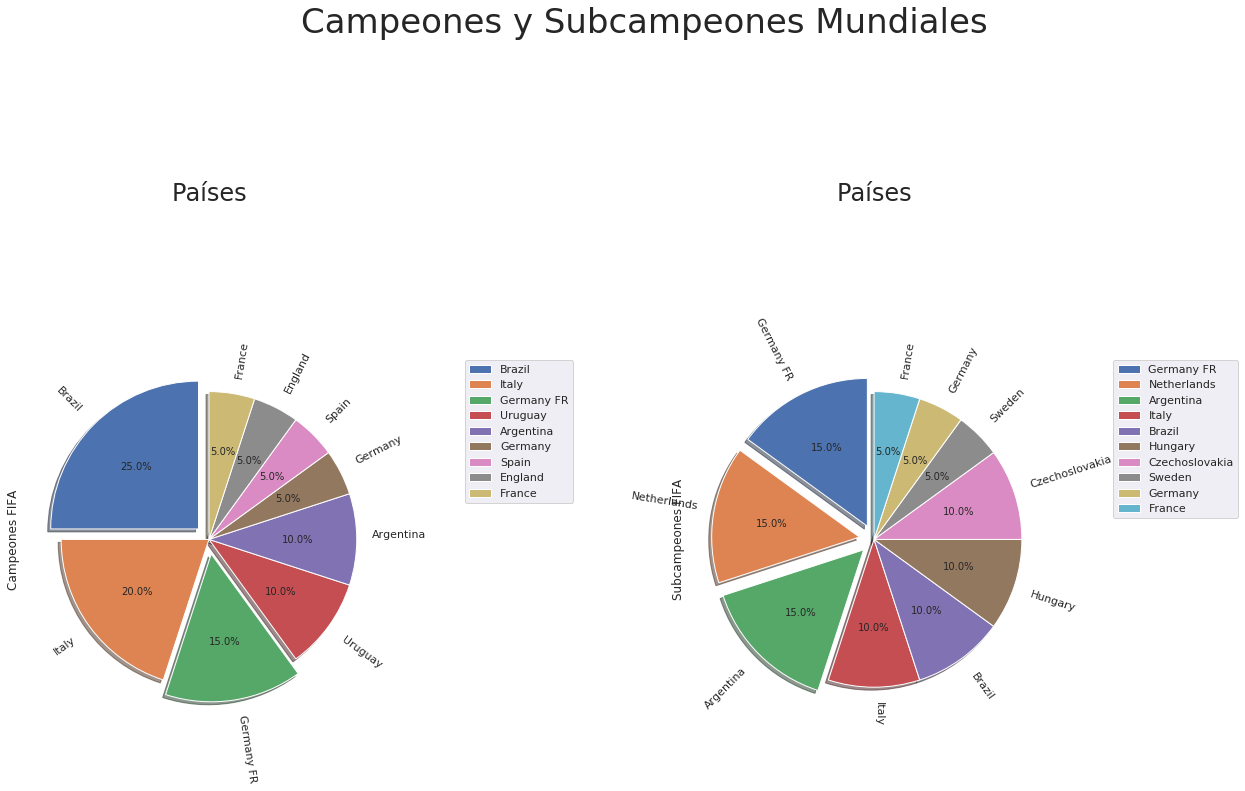

In [0]:
#Porcentaje de participación equipos finales FIFA
%matplotlib inline
fig, ax = plt.subplots(ncols=2, figsize=(18,15))
fig.suptitle("Campeones y Subcampeones Mundiales", fontsize=34)

Campeones=cups['Winner'].value_counts().to_frame('Campeones FIFA');
Campeones.plot.pie(figsize=(8,8),subplots=True, explode=(0.1,0,0.1,0,0,0,0,0,0), rotatelabels=True, autopct='%1.1f%%', startangle=90, shadow=True, legend = 'Campeones FIFA', ax=ax[0]);


Subcamps = cups['Runners-Up'].value_counts().to_frame('Subcampeones FIFA');
Subcamps.plot.pie(figsize=(8,8), subplots= True, explode = (0.1,0.1,0.1,0,0,0,0,0,0,0), rotatelabels=True, autopct= '%1.1f%%', startangle=90, shadow=True, legend = 'Subcampeones FIFA', ax=ax[1]);

#plt.legend(loc=3, frameon=True, bbox_to_anchor=(1,0,0.5,1));

for axes in ax:
    axes.set_title('Países', fontsize=24, y=1.4)
    axes.legend(loc='best', frameon=True, bbox_to_anchor=(1,0,0.5,1));
fig.tight_layout()


plt.subplots_adjust(wspace=0.8, hspace = 0.9)



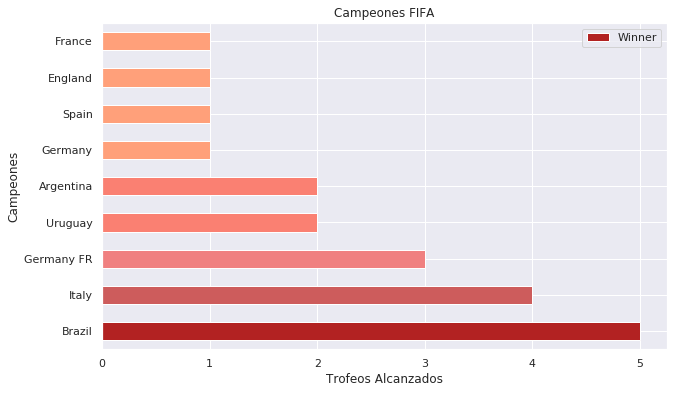

In [0]:
#Grafico equipos campeones

plt.subplot(1, 2, 1)
plt.title( 'Campeones FIFA')
plt.xlabel('Trofeos Alcanzados');
plt.ylabel('Campeones');

cups[['Year','Country','Winner']]
cups['Winner'].value_counts().plot(kind = 'barh', figsize = (6,6), legend = 'Campeones FIFA', color = ('firebrick','indianred','lightcoral', 'salmon','salmon',
                                                                                                        'lightsalmon','lightsalmon','lightsalmon','lightsalmon'));

plt.subplots_adjust(right=3.0)


          


##4.Hacer un análisis de la concurrencia de público para los años donde se disputó el mundial FIFA, repita lo anterior según los distintos horarios en los que se disputan los encuentros. Indique los partidos con mayor concurrencia de público.


In [0]:
matches = matches.iloc[0:852,:] 

matches = matches.drop_duplicates( keep='first')
jugadores = players.drop_duplicates(keep = 'first')


a = matches[matches['Stadium']=='Estadio Beira-Rio']['Attendance'].mean()


matches.fillna(value=a,inplace = True)
jugadores['Position'].fillna('N',inplace = True)

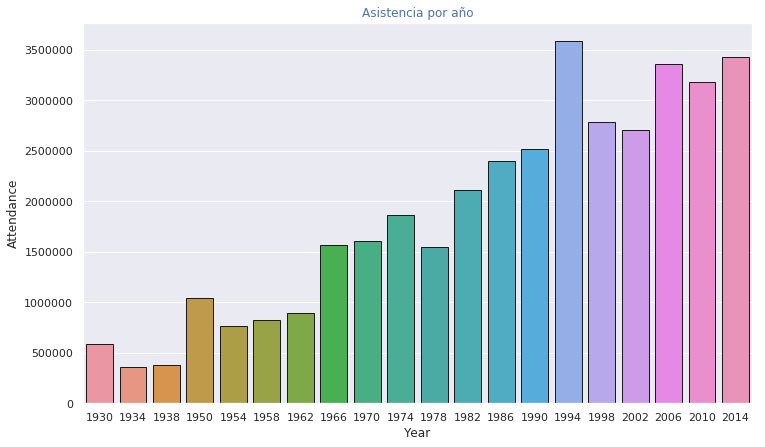

In [0]:
sns.set_style("darkgrid")
att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
# plt.grid(True)
plt.title("Asistencia por año",color='b')
plt.show()

In [0]:


'''Serie Tiempo'''

# Pasar la columna Datetime a serie de tiempo pandas: timedelta (averiguar) y guardar en nueva columna "Horarios"
matches['Horarios'] = matches['Time']

# De la columna "Horarios" extraer los segundos y tranformar la serie a "solo" tiempo con uso de apply y lambda
matches.loc[:, 'Horarios'] = matches['Horarios'].dt.seconds.apply(lambda x: pd.Timedelta(seconds = x))

# Generamos nueva columna "Hr" donde tranformamos serie de tiempo con las horas en datos tipo float
# ocupando división por 24 horas
matches['Hr'] = np.round(matches['Horarios']/pd.Timedelta('1 hour'), 2)

#muestro resultados
matches.head(2)

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Horarios,Hr
0,1930.0,1930-07-13,15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15:00:00,15.0
1,1930.0,1930-07-13,15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15:00:00,15.0


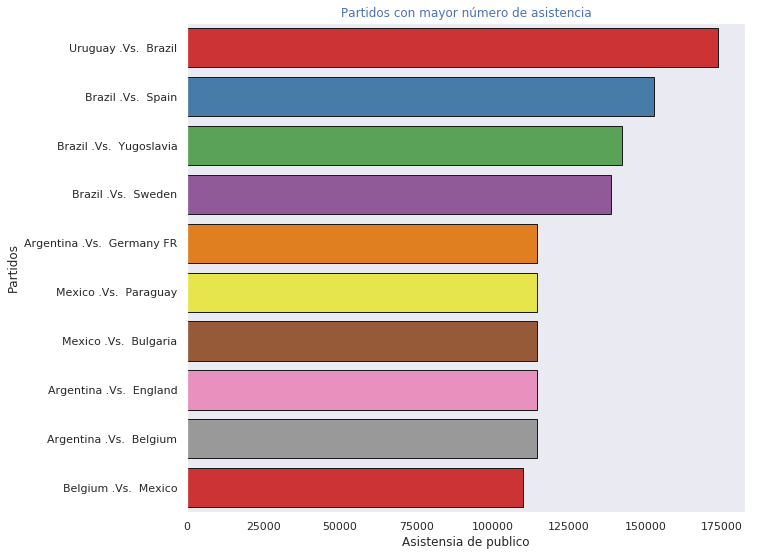

In [0]:
primeros_10 = matches.sort_values(by="Attendance",ascending=False)[:10]    # primeros 10 partidos con mayor asistensia de publico 
primeros_10 = primeros_10[['Year', 'Date','Stadium', 'City', 'Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']] # llamamos solo algunas columnas
primeros_10["Stadium"] = primeros_10["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracana Estadio") # remplazo del nombre del estadio ya que era muy largo
primeros_10["mt"] = primeros_10["Home Team Name"] + " .Vs.  " + primeros_10["Away Team Name"] # creamos nueva columna en 'mt en donde sale los equipos a competir'

plt.figure(figsize=(10,9))
ax = sns.barplot(y =primeros_10["mt"],x = primeros_10["Attendance"],palette="Set1",
                 linewidth = 1,edgecolor="k"*len(primeros_10))
plt.ylabel("Partidos")
plt.xlabel("Asistensia de publico")
plt.title("Partidos con mayor número de asistencia",color='b')
plt.grid(False)
plt.show()

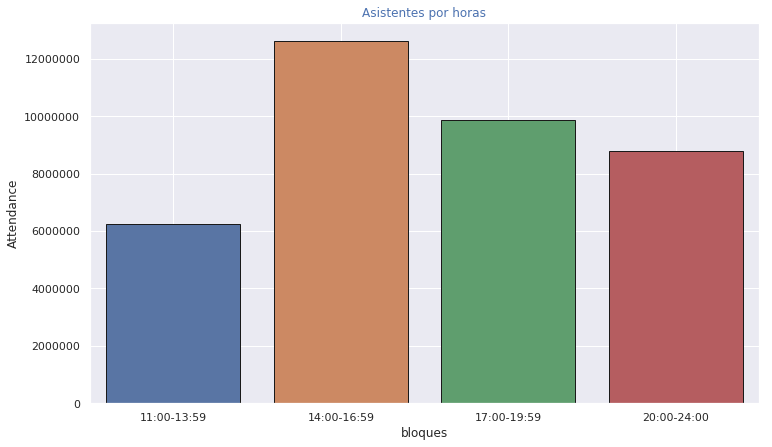

In [0]:
import matplotlib.ticker as ticker

matches['bloques'] = pd.cut(matches.loc[:,'Hr'], [11, 14, 17, 20, 24],right=False, labels=['11:00-13:59','14:00-16:59','17:00-19:59','20:00-24:00']) # nueva columna que tiene la division de horarios en 4

asist2= matches.groupby("bloques")["Attendance"].sum().reset_index()
plt.figure(figsize=(12,7))
sns.barplot(asist2['bloques'],asist2["Attendance"],linewidth=1,edgecolor="k"*len(asist2))
plt.grid(True)
plt.title("Asistentes por horas",color='b')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##5.Visualice la cantidad de goles anotados por cada uno de los eventos mundialistas. Luego, muestre la distribución de los goles de local y visita. Comente sus resultados.


In [0]:
matches['Away Team Goals'].sum()

854.0

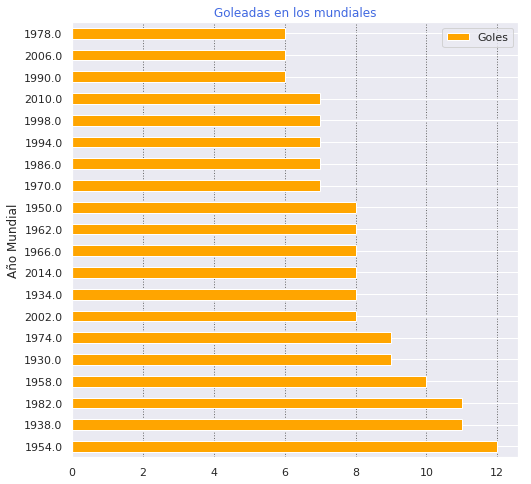

In [0]:
# Goleadas

matches['total_goals'] = matches['Home Team Goals']+ matches['Away Team Goals']

goleadas = matches.groupby(['Year']).agg({'total_goals':np.max})

goleadas.sort_values(by='total_goals', ascending=False).plot(kind='barh', 
                     color= 'orange', figsize=(8,8))

plt.grid(False, axis='x', color='dimgrey', linestyle=':', linewidth=1)
plt.ylabel('Año Mundial')
plt.title('Goleadas en los mundiales', color='royalblue')
plt.legend({'Goles'});


1525.0

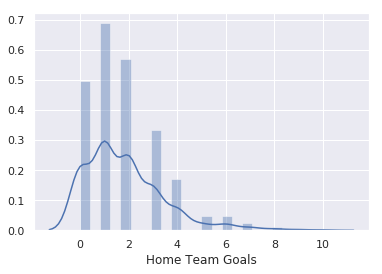

In [0]:

sns.distplot(matches["Home Team Goals"].dropna(axis = 0));
matches["Home Team Goals"].sum()

854.0

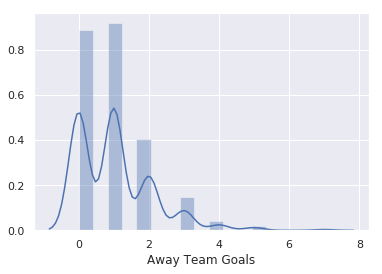

In [0]:

sns.distplot(matches["Away Team Goals"].dropna(axis = 0));
matches["Away Team Goals"].sum()

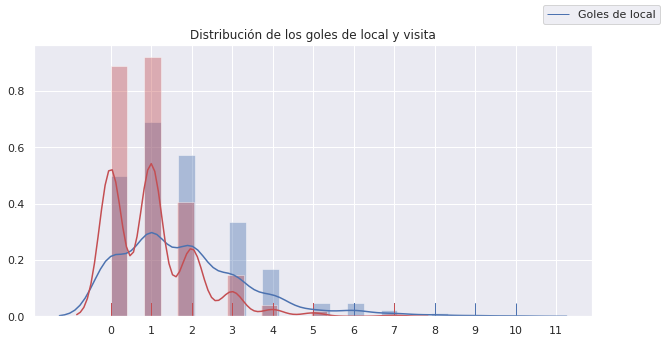

In [0]:
# Gráfico de Distribución de los goles de local y visita / contrastados

fig = plt.figure(figsize=(10,5))
plt.xticks(np.arange(0,12,1))
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.title("Distribución de los goles de local y visita")
plt.xlabel(' ')
fig.legend(labels=['Goles de local'])
plt.show()





##6.Visualizar los resultados de los partidos por países (ganados, empatados, perdidos).

In [0]:
#Limpieza nombres de países
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">','')
matches["Home Team Name"] = matches["Home Team Name"].str.replace('IR Iran','Iran')
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire",'Ivory Coast')
matches["Home Team Name"] = matches["Home Team Name"].str.replace('Germany FR','Germany')
matches["Home Team Name"] = matches["Home Team Name"].str.replace('German DR','Germany')
matches["Home Team Initials"] = matches["Home Team Initials"].str.replace('FRG','GER')
matches["Home Team Initials"] = matches["Home Team Initials"].str.replace('GDR','GER')

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">','')
matches["Away Team Name"] = matches["Away Team Name"].str.replace('IR Iran','Iran')
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire",'Ivory Coast')
matches["Away Team Name"] = matches["Away Team Name"].str.replace('Germany FR','Germany')
matches["Away Team Name"] = matches["Away Team Name"].str.replace('German DR','Germany')
matches["Away Team Initials"] = matches["Away Team Initials"].str.replace('FRG','GER')
matches["Away Team Initials"] = matches["Away Team Initials"].str.replace('GDR','GER')

In [0]:
#Definición partidos ganados, empatados y perdidos
# Se define equipo ganador (home/away) sin penales
winner_by_score_home = matches['Home Team Goals'] > matches['Away Team Goals']
#winner_by_score_home
winner_by_score_away = matches['Home Team Goals'] < matches['Away Team Goals']
win_by_score = winner_by_score_home | winner_by_score_away

# Se define si ganador se decidió por penales
win_penalties = matches['Win conditions'].str.len() > 1

# Se crea un array en el que se añade ganador local o visita cuando corresponda, de lo contrario, espacio en blanco
win_team_home = np.where(winner_by_score_home, matches['Home Team Name'], '')
win_team_away = np.where(winner_by_score_away, matches['Away Team Name'], '')

# Se separan los elementos de 'Win conditions' en columnas para evaluar ganador por penales si hay empate
win_cond = matches['Win conditions'].str.split(pat='\(|\)|-', expand=True)

# Cuando corresponda, se asigna ganador Home o Away si 'Win conditions' tiene alguna información
win_team_penalties = np.where(win_cond[0].str.len() > 1, np.where(win_cond[1] > win_cond[2], matches['Home Team Name'], matches['Away Team Name']), '')

# Si la victoria no se ha definido, se rellenan los campos con los ganadores respectivos por penales
win_team = np.where(win_team_home != '', win_team_home, np.where(win_team_away != '', win_team_away, win_team_penalties))

# Se define en 'Result' si al finalizar el partido ha habido victoria o empate
matches.loc[:,'Result'] = np.where(win_by_score, 'win', np.where(win_penalties, 'win', 'draw'))
# Se crean las columnas 'Winner' y 'Loser' para los equipos respectivos
matches.loc[:,'Winner'] = win_team
matches.loc[:,'Loser'] = np.where(matches['Result'] != 'draw', np.where(win_team == matches['Home Team Name'], matches['Away Team Name'], matches['Home Team Name']), '')

# Se modifica el df 'win_cond' para mostrar la condición y los penales cuando corresponda
win_cond = win_cond.reset_index()
win_cond = win_cond.drop(['index',3], axis=1)
win_cond.rename(columns={0: 'Win Condition', 1: 'Home Team Penalty', 2: 'Away Team Penalty'}, inplace=True)

In [0]:
# Se hace un conteo de participaciones de equipos local y visita
home_team = matches['Home Team Name'].value_counts().reset_index()
home_team.columns = ['Teams','Matches']
away_team = matches["Away Team Name"].value_counts().reset_index()
away_team.columns = ['Teams','Matches']

# Se crea un nuevo df con los datos obtenidos
match = pd.concat([home_team,away_team],axis=0)
match = match.groupby('Teams')['Matches'].sum().reset_index().sort_values(by='Matches',ascending=False)
match = match.reset_index().drop('index', axis=1)
match.head()

,Teams,Matches
0,Germany,112
1,Brazil,104
2,Italy,83
3,Argentina,77
4,England,62


In [0]:
# Se hace un conteo de victorias y derrotas por equipo
lost = matches['Loser'].value_counts().reset_index()
win = matches['Winner'].value_counts().reset_index()

# # Se unen los valores en un nuevo df con los nombres de equipos
result = pd.merge(win,lost,on='index',how='outer')
result = result.drop(result.index[0])
result.columns  = ['Teams','Ganados','Perdidos']

# Se añade al df con resultados, el total de participaciones obtenidas anteriormente
result = result.merge(match,left_on='Teams',right_on='Teams',how='left')
result = result.fillna(0)

# Se obtiene el número de partidos empatados en base al total, los ganados y perdidos
empatados = result['Matches']-(result['Ganados']+result['Perdidos'])
result.insert(3,'Empatados',empatados)
result = result.astype({'Ganados': int, 'Empatados': int})

result = result.sort_values(by='Ganados',ascending=False)
result.head(10)

,Teams,Ganados,Perdidos,Empatados,Matches
0,Brazil,74,17,13,104
1,Germany,72,22,18,112
2,Italy,48,18,17,83
3,Argentina,43,25,9,77
4,Spain,32,18,9,59
5,Netherlands,29,12,9,50
6,France,28,23,8,59
7,England,27,18,17,62
8,Uruguay,21,19,11,51
9,Yugoslavia,17,13,7,37


##Partidos perdidos por pais

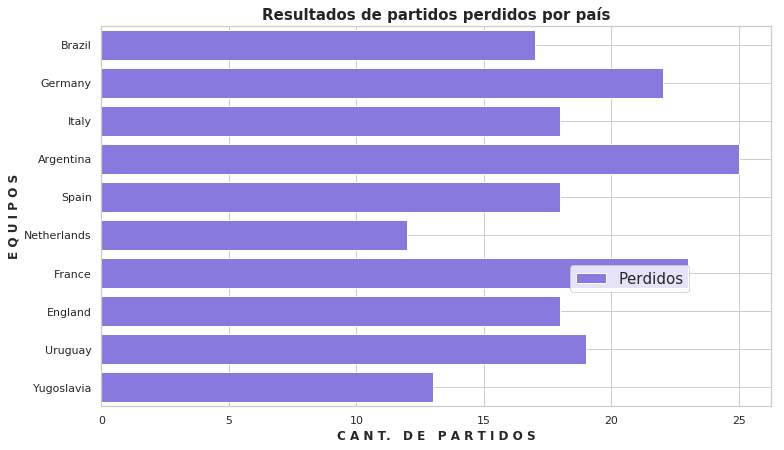

In [0]:
empatados = result['Empatados']+result['Ganados']

plt.figure(figsize=(12, 7))
sns.set(style= 'whitegrid')
sns.barplot(x='Perdidos', y='Teams', data=result[:10], label='Perdidos', color='mediumslateblue' )
plt.title('Resultados de partidos perdidos por país', weight = 'bold', fontsize=15)
plt.ylabel('E Q U I P O S', weight = 'bold')
plt.xlabel('C A N T.   D E   P A R T I D O S', weight = 'bold')
plt.legend(loc=(0.7, 0.3), fontsize=12, prop={'size': 15})
plt.grid(True)
plt.show()

##Partidos ganados por pais

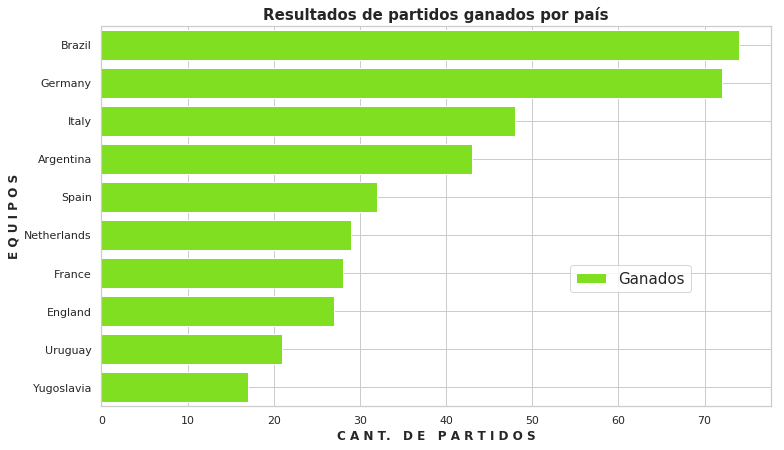

In [0]:
empatados = result['Empatados']+result['Ganados']

plt.figure(figsize=(12, 7))
sns.set(style= 'whitegrid')
sns.barplot(x='Ganados', y='Teams', data=result[:10], label='Ganados', color='Chartreuse')
plt.title('Resultados de partidos ganados por país', weight = 'bold', fontsize=15)
plt.ylabel('E Q U I P O S', weight = 'bold')
plt.xlabel('C A N T.   D E   P A R T I D O S', weight = 'bold')
plt.legend(loc=(0.7, 0.3), fontsize=12, prop={'size': 15})
plt.grid(True)
plt.show()

##Partidos empatador por pais

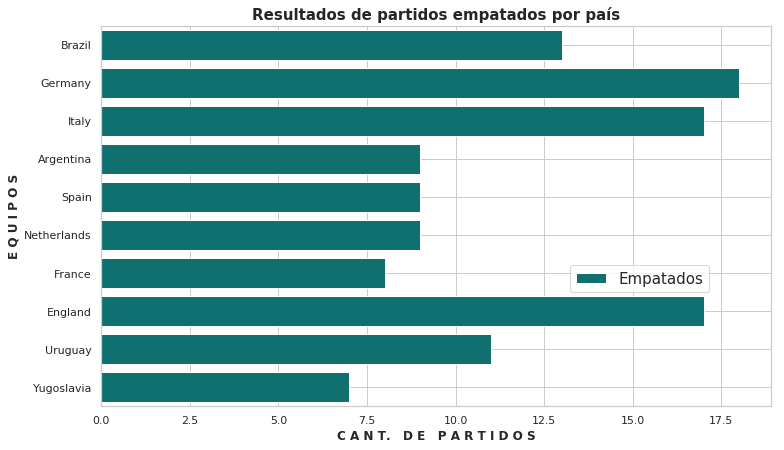

In [0]:
empatados = result['Empatados']+result['Ganados']

plt.figure(figsize=(12, 7))
sns.set(style= 'whitegrid')
sns.barplot(x= 'Empatados', y='Teams', data=result[:10], label='Empatados', color='teal')
plt.title('Resultados de partidos empatados por país', weight = 'bold', fontsize=15)
plt.ylabel('E Q U I P O S', weight = 'bold')
plt.xlabel('C A N T.   D E   P A R T I D O S', weight = 'bold')
plt.legend(loc=(0.7, 0.3), fontsize=12, prop={'size': 15})
plt.grid(True)
plt.show()

##7.Realice tanto Cross - Table como Pivot - Table para mejorar su análisis en base a elementos como por ejemplo, año y ciudad del evento mundialista.

In [0]:
team_name1 = matches["Home Team Name"].value_counts().reset_index()
team_name1.columns = ["Selección","Partidos Locales"]
team_name1

team_name2 = matches["Away Team Name"].value_counts().reset_index()
team_name2.columns = ["Selección","Partidos Visitante"]
#team_name2

team_name1 = team_name1.merge(team_name2,left_on = 'Selección',right_on = 'Selección',how = 'left')
#team_name1
  
goles_home = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
goles_home.columns = ["Selección","Goles Locales"]

goles_away = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
goles_away.columns = ["Selección","Goles Visitante"]

goles_home = goles_home.merge(goles_away,left_on = 'Selección',right_on = 'Selección',how = 'left')

merge_1 = team_name1[["Selección","Partidos Locales","Partidos Visitante"]]
merge_2 = goles_home[["Selección","Goles Locales","Goles Visitante"]]
merge_1 = merge_1.merge(merge_2,left_on = 'Selección',right_on = 'Selección',how = 'left')

merge_1['PG']= cups['GoalsScored']/cups['MatchesPlayed']

merge_1.head()

,Selección,Partidos Locales,Partidos Visitante,Goles Locales,Goles Visitante,PG
0,Brazil,78,26,176.0,45.0,3.888889
1,Germany,78,34,168.0,61.0,4.117647
2,Italy,57,26,99.0,29.0,4.666667
3,Argentina,52,25,109.0,22.0,4.000000
4,England,35,27,54.0,25.0,5.384615


In [0]:
tabla = merge_1.loc[:,['Partidos Locales','Partidos Visitante','Goles Locales','Goles Visitante','PG','Selección']].pivot_table(index=['Selección'], aggfunc= 'sum', fill_value=0).reset_index()

tabla

,Selección,Goles Locales,Goles Visitante,PG,Partidos Locales,Partidos Visitante
0,Algeria,5,8,0.000000,6,7
1,Angola,0,1,0.000000,1,2
2,Argentina,109,22,4.000000,52,25
3,Australia,7,4,0.000000,6,7
4,Austria,31,12,0.000000,13,16
5,Belgium,25,27,2.211538,17,24
6,Bolivia,1,0,0.000000,1,5
7,Bosnia and Herzegovina,3,1,0.000000,1,2
8,Brazil,176,45,3.888889,78,26
9,Bulgaria,11,11,0.000000,7,19


In [0]:
#Jugadores que más ha disputados una final

pd.crosstab(index =[cups['Year'],matches['Attendance'],cups['Country']], columns = [cups['Year'],cups['Winner']]).reset_index()


Year,Year,Attendance,Country,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014
Winner,,,,Uruguay,Italy,Italy,Uruguay,Germany FR,Brazil,Brazil,England,Brazil,Germany FR,Argentina,Italy,Argentina,Germany FR,Brazil,France,Brazil,Italy,Spain,Germany
0,1930,4444.0,Uruguay,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1934,18346.0,Italy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1938,24059.0,France,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1950,2549.0,Brazil,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1954,23409.0,Switzerland,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1958,9249.0,Sweden,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1962,18306.0,Chile,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1966,18306.0,England,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1970,57735.0,Mexico,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


##8.Realice un análisis de los jugadores con las mejores estadísticas según los mundiales disputados (participaciones, rendimiento, etc).


In [0]:
matches= pd.read_csv('WorldCupMatches.csv')
matches.isna().sum()

matches = matches[pd.notnull(matches['Year'])]

matches.duplicated().sum()
matches.drop_duplicates(inplace=True)

matches.isna().sum()
matches.loc[matches['Home Team Name']=="Germany"]

#Estadio Beira-Rio donde esta el Nan en Attendance
promedio = matches.loc[matches['Stadium']=="Estadio Beira-Rio"].mean().round()
#Promedio attendace es de 42976.5
matches.replace(np.NaN, promedio, inplace=True)


In [0]:
players= pd.read_csv('WorldCupPlayers.csv')
players.isna().sum() 
# en la columna Position existen 33.641 datos nulos
# en la columna Event existen 28.715 datos nulos

players.duplicated().sum()
players.drop_duplicates(inplace=True)


In [0]:
cups= pd.read_csv('WorldCups.csv')
cups.isna().sum() 
# Sin datos nulos

cups.duplicated().sum()
# Sin filas duplicadas
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [0]:
def transformacionEvent(nombreEvento):
    events = pd.DataFrame(columns=["Event 1", "Event 2", "Event 3", "Event 4", "Event 5"])
    events[["Event 1", "Event 2", "Event 3", "Event 4", "Event 5"]] = players['Event'].str.split(' ',expand=True)
    events

    events["MatchID"] = players["MatchID"]
    events["Player Name"] = players["Player Name"]
    events["Line-up"] = players["Line-up"]
    events["Team Initials"] = players["Team Initials"]
    events["Shirt Number"] = players["Shirt Number"]

    te = events[nombreEvento].str.strip("'")
    te_G = te[(te.str[0]=='G') | (te.str[0]=='P')].str.strip('G').str.strip('P')
    te_Y = te[te.str[0]=='Y'].str.strip('Y')
    te_RSY = te[(te.str[0]=='R')&(te.str[1]=='S')&(te.str[2]=='Y')].str.strip('RSY')
    te_R = te[(te.str[0]=='R')&(te.str[1]!='S')&(te.str[2]!='Y')].str.strip('R')
    te_O = te[(te.str[0]=='O')&(te.str[1]!='H')].str.strip('O')
    te_I = te[(te.str[0]=='I')&(te.str[1]!='H')].str.strip('I')
    te_OH = te[(te.str[0]=='O')&(te.str[1]=='H')].str.strip('OH')
    te_IH = te[(te.str[0]=='I')&(te.str[1]=='H')].str.strip('IH')
    te_W = te[te.str[0]=='W'].str.strip('W')
    #te_P = te[te.str[0]=='P'].str.strip('P')
    te_MP = te[(te.str[0]=='M')&(te.str[1]=='P')].str.strip('MP')
    te_N = te[te.str[0]=='N']

    events['G'] = te_G
    events['Y'] = te_Y
    events['RSY'] = te_RSY
    events['R'] = te_R
    events['O'] = te_O
    events['I'] = te_I
    events['OH'] = te_OH
    events['IH'] = te_IH
    events['W'] = te_W
    #events['P'] = te_P
    events['MP'] = te_MP
    events['N'] = te_N
    return events


events = transformacionEvent("Event 1")
events1 = transformacionEvent("Event 2")
events2 = transformacionEvent("Event 3")
events3 = transformacionEvent("Event 4")
events4 = transformacionEvent("Event 5")
eventos = pd.concat([events, events1, events2, events3, events4], ignore_index=True)
eventos.drop(['Event 1', "Event 2", "Event 3", "Event 4", "Event 5"], axis=1, inplace=True)
eventos.dropna(subset=["G", "Y", "RSY", "R", "O", "I", "OH", "IH", "W",  "MP", "N"], how='all', inplace=True)


### Cambio de nombre de jugadores y paises 

In [0]:
# C. RONALDO
players[(players.loc[:,'Player Name']== 'RONALDO') & (players.loc[:,'Team Initials']== 'POR')] = players[(players.loc[:,'Player Name']== 'RONALDO') & (players.loc[:,'Team Initials']== 'POR')].replace('RONALDO','C.RONALDO')
eventos[(eventos.loc[:,'Player Name']== 'RONALDO') & (eventos.loc[:,'Team Initials']== 'POR')] = eventos[(eventos.loc[:,'Player Name']== 'RONALDO') & (eventos.loc[:,'Team Initials']== 'POR')].replace('RONALDO','C.RONALDO')

# Gerd MULLER
players[players.loc[:,'Player Name']== 'Gerd MUELLER'] = players[players.loc[:,'Player Name']== 'Gerd MUELLER'].replace('Gerd MUELLER','Gerd MULLER')
eventos[eventos.loc[:,'Player Name']== 'Gerd MUELLER'] = eventos[eventos.loc[:,'Player Name']== 'Gerd MUELLER'].replace('Gerd MUELLER','Gerd MULLER')

# Juergen KLINSMANN
players[players.loc[:,'Player Name']== 'Juergen KLINSMANN'] = players[players.loc[:,'Player Name']== 'Juergen KLINSMANN'].replace('Juergen KLINSMANN','KLINSMANN')
eventos[eventos.loc[:,'Player Name']== 'Juergen KLINSMANN'] = eventos[eventos.loc[:,'Player Name']== 'Juergen KLINSMANN'].replace('Juergen KLINSMANN','KLINSMANN')

# Andreas MOLLER
players[players.loc[:,'Player Name']== 'Andreas MOELLER'] = players[players.loc[:,'Player Name']== 'Andreas MOELLER'].replace('Andreas MOELLER','Andreas MOLLER')
eventos[eventos.loc[:,'Player Name']== 'Andreas MOELLER'] = eventos[eventos.loc[:,'Player Name']== 'Andreas MOELLER'].replace('Andreas MOELLER','Andreas MOLLER')

players[(players.loc[:,'Player Name']== 'M�LLER') & (players.loc[:,'Shirt Number']== 7)] = players[(players.loc[:,'Player Name']== 'M�LLER') & (players.loc[:,'Shirt Number']== 7)].replace('M�LLER','Andreas MOLLER')
eventos[(eventos.loc[:,'Player Name']== 'M�LLER') & (eventos.loc[:,'Shirt Number']== 7)] = eventos[(eventos.loc[:,'Player Name']== 'M�LLER') & (eventos.loc[:,'Shirt Number']== 7)].replace('M�LLER','Andreas MOLLER')

# Thomas MULLER
players[players.loc[:,'Player Name']== 'M�LLER'] = players[players.loc[:,'Player Name']== 'M�LLER'].replace('M�LLER','Thomas MULLER')
eventos[eventos.loc[:,'Player Name']== 'M�LLER'] = eventos[eventos.loc[:,'Player Name']== 'M�LLER'].replace('M�LLER','Thomas MULLER')

# PELÉ
players[players.loc[:,'Player Name']== 'PEL� (Edson Arantes do Nascimento)'] = players[players.loc[:,'Player Name']== 'PEL� (Edson Arantes do Nascimento)'].replace('PEL� (Edson Arantes do Nascimento)','PELÉ')
eventos[eventos.loc[:,'Player Name']== 'PEL� (Edson Arantes do Nascimento)'] = eventos[eventos.loc[:,'Player Name']== 'PEL� (Edson Arantes do Nascimento)'].replace('PEL� (Edson Arantes do Nascimento)','PELÉ')

# BATISTUTA
players[players.loc[:,'Player Name']== 'Gabriel BATISTUTA'] = players[players.loc[:,'Player Name']== 'Gabriel BATISTUTA'].replace('Gabriel BATISTUTA','BATISTUTA')
eventos[eventos.loc[:,'Player Name']== 'Gabriel BATISTUTA'] = eventos[eventos.loc[:,'Player Name']== 'Gabriel BATISTUTA'].replace('Gabriel BATISTUTA','BATISTUTA')

# Christian VIERI
players[players.loc[:,'Player Name']== 'VIERI'] = players[players.loc[:,'Player Name']== 'VIERI'].replace('VIERI','Christian VIERI')
eventos[eventos.loc[:,'Player Name']== 'VIERI'] = eventos[eventos.loc[:,'Player Name']== 'VIERI'].replace('VIERI','Christian VIERI')

# Roberto BAGGIO
players[players.loc[:,'Player Name']== 'BAGGIO R.'] = players[players.loc[:,'Player Name']== 'BAGGIO R.'].replace('BAGGIO R.','Roberto BAGGIO')
players[players.loc[:,'Player Name']== 'R. BAGGIO'] = players[players.loc[:,'Player Name']== 'R. BAGGIO'].replace('R. BAGGIO','Roberto BAGGIO')

eventos[eventos.loc[:,'Player Name']== 'BAGGIO R.'] = eventos[eventos.loc[:,'Player Name']== 'BAGGIO R.'].replace('BAGGIO R.','Roberto BAGGIO')
eventos[eventos.loc[:,'Player Name']== 'R. BAGGIO'] = eventos[eventos.loc[:,'Player Name']== 'R. BAGGIO'].replace('R. BAGGIO','Roberto BAGGIO')

In [0]:
# Modificaciones de nombre y equipo para obtener los resultados que necesitamos
# se unen las Alemanias, tanto en la base Matches como en Players
# se unen los Klinsmann

matches["Home Team Name"] = matches["Home Team Name"].str.replace('Germany FR','Germany')
matches["Home Team Name"] = matches["Home Team Name"].str.replace('German DR','Germany')
matches["Home Team Initials"] = matches["Home Team Initials"].str.replace('FRG','GER')
matches["Home Team Initials"] = matches["Home Team Initials"].str.replace('GDR','GER')
matches["Away Team Name"] = matches["Away Team Name"].str.replace('Germany FR','Germany')
matches["Away Team Name"] = matches["Away Team Name"].str.replace('German DR','Germany')
matches["Away Team Initials"] = matches["Away Team Initials"].str.replace('FRG','GER')
matches["Away Team Initials"] = matches["Away Team Initials"].str.replace('GDR','GER')

players['Team Initials'] = players['Team Initials'].str.replace('FRG','GER')
players['Team Initials'] = players['Team Initials'].str.replace('GDR','GER')

### Desarrollo del punto 8.

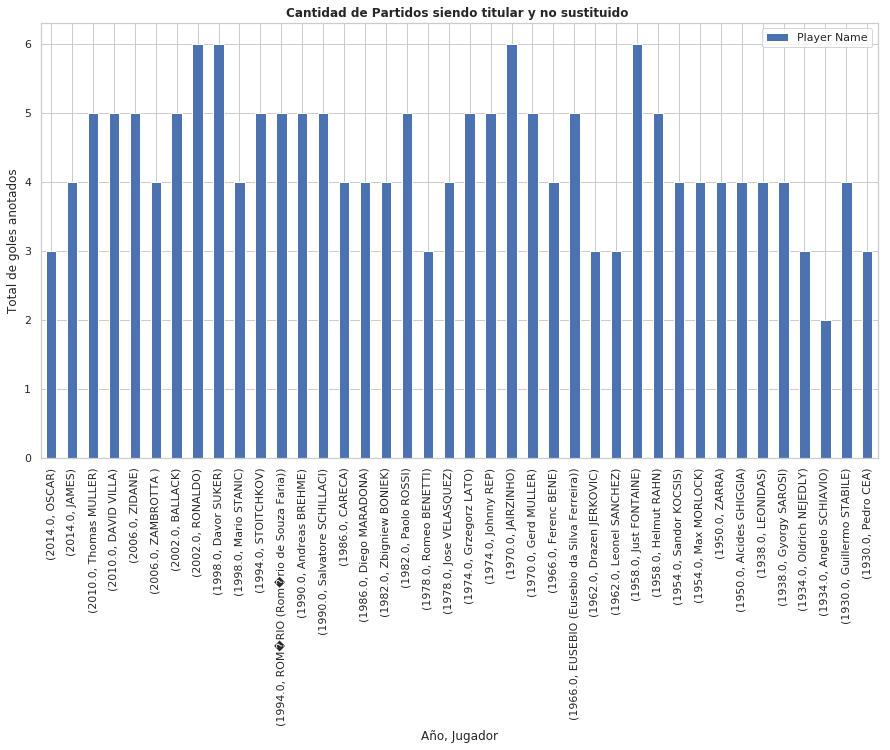

In [0]:
# Se selecciona la columna O, sustitution Out
sinC = eventos.loc[:, ['MatchID', 'Player Name', 'Line-up', 'O']]

# Se seleccionan jugadores que son titulares y no tienen nulos en la columna O
sinC = sinC.loc[(sinC["Line-up"]=="S") & (sinC["O"].isnull())]

sinC = pd.merge(sinC, matches, on=['MatchID'], how='left').iloc[:,0:5]

sinC.drop_duplicates(subset=["MatchID", "Player Name"], inplace=True)

sinC = sinC.drop(['Line-up', 'O'], axis=1)

# Se hace una agrupacion por año, por jugador mostrando total de goles
table = sinC.groupby('Year')['Player Name'].value_counts()
table = table.sort_values(ascending=False)

table.groupby(level=0).head(2).to_frame().sort_values(by="Year", ascending=False).plot(kind="bar", figsize=(15,8))

plt.title('Cantidad de Partidos siendo titular y no sustituido ',weight = "bold")
plt.xlabel("Año, Jugador")
plt.ylabel("Total de goles anotados")
sns.set(style='whitegrid')

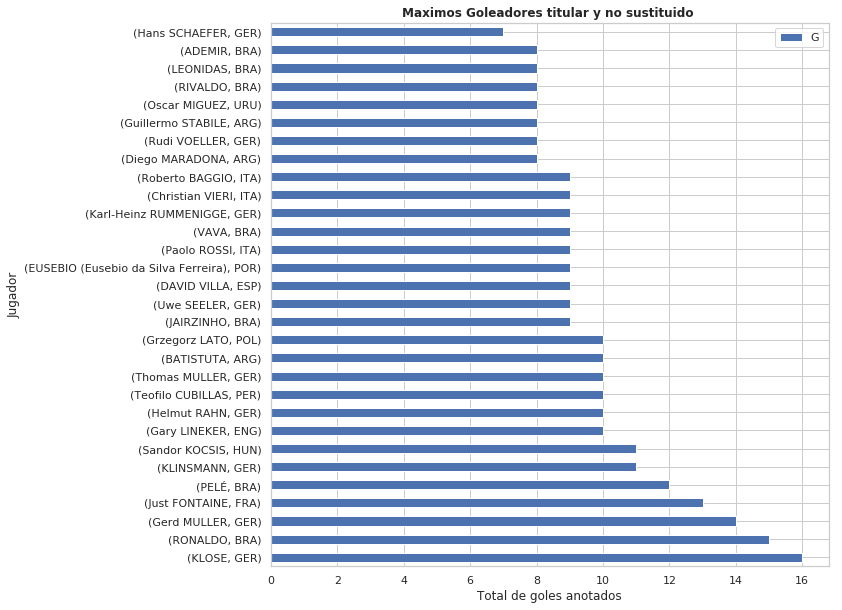

In [0]:
gol = eventos.loc[:, ['MatchID', 'Player Name', 'Line-up', 'G']]
goleador = gol[pd.notnull(gol['G'])]
M = matches.loc[:,['Year', 'MatchID', 'RoundID']]

topgol = (pd.merge(M, goleador, on= ['MatchID'], how='outer'))
jugd = players.loc[:, ['MatchID', 'Team Initials', 'Player Name']]
finaltop = (pd.merge(topgol, jugd, on= ['MatchID', 'Player Name'], how='outer'))

finaltop.groupby(['Player Name', "Team Initials"])['G'].count().to_frame().sort_values(by='G', 
                  ascending= False).head(30).plot(kind="barh", figsize=(10,10))

plt.title('Maximos Goleadores titular y no sustituido ',weight = "bold")
plt.xlabel("Total de goles anotados")
plt.ylabel("Jugador")
sns.set(style='whitegrid');

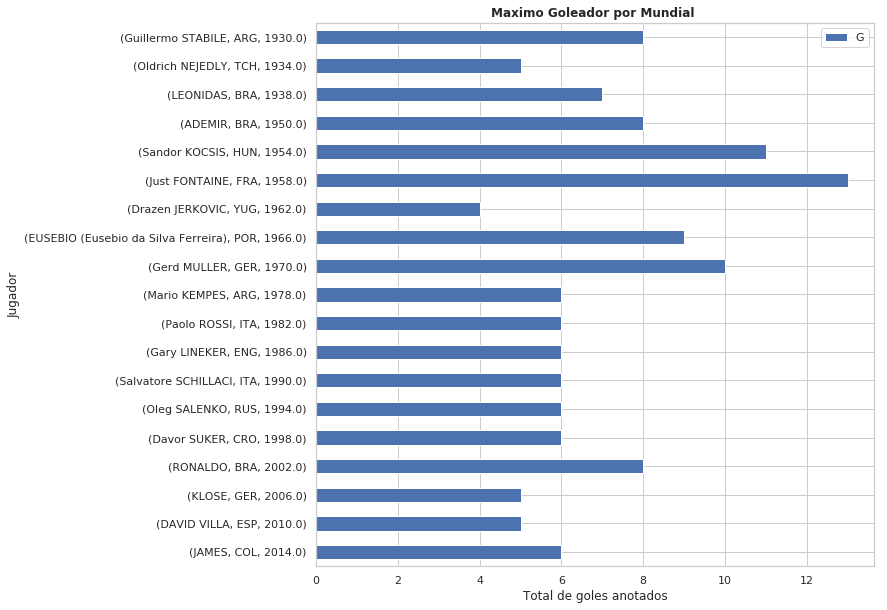

In [0]:
gol= eventos.loc[:, ['MatchID', 'Player Name', 'Line-up', 'G']]
goleador = gol[pd.notnull(gol['G'])]
M= matches.loc[:,['Year', 'MatchID', 'RoundID']]

topgol = (pd.merge(M, goleador, on= ['MatchID'], how= 'outer'))
jugd= players.loc[:, ['MatchID', 'Team Initials', 'Player Name']]
finaltop= (pd.merge(topgol, jugd, on= ['MatchID', 'Player Name'], how= 'outer'))

# Maximo de goles anotados en toda su participacion en los mundiales
a= finaltop.groupby(["Year", 'Player Name', "Team Initials"])['G'].count().to_frame().sort_values(by=["Year",'G'],ascending= False).reset_index()#.head(30)#.plot(kind="barh", figsize=(10,10))

# Se definen variables para definir el primer goleador de mayor a menor por año 
# para luego unirlo en un dataframe y graficarlo
b= a[a['Year']==1930.0].head(1)
c= a[a['Year']==1934.0].head(1)
d= a[a['Year']==1938.0].head(1)
e= a[a['Year']==1950.0].head(1)
f= a[a['Year']==1954.0].head(1)
g= a[a['Year']==1958.0].head(1)
h= a[a['Year']==1962.0].head(1)
i= a[a['Year']==1966.0].head(1)
j= a[a['Year']==1970.0].head(1)
k= a[a['Year']==1974.0].head(1)
l= a[a['Year']==1978.0].head(1)
m= a[a['Year']==1982.0].head(1)
n= a[a['Year']==1986.0].head(1)
o= a[a['Year']==1990.0].head(1)
p= a[a['Year']==1994.0].head(1)
q= a[a['Year']==1998.0].head(1)
r= a[a['Year']==2002.0].head(1)
s= a[a['Year']==2006.0].head(1)
t= a[a['Year']==2010.0].head(1)
u= a[a['Year']==2014.0].head(1)

goleador_x_mundial= pd.concat([b,c,d,e,f,g,h,i,j,l,m,n,o,p,q,r,s,t,u],axis=0)
goleador_x_mundial#.plot(kind="bar")


goleador_x_mundial.groupby(['Player Name', "Team Initials", "Year"])['G'].sum().to_frame().sort_values(by='Year' ,ascending= False).head(30).plot(kind="barh", figsize=(10,10))
plt.title('Maximo Goleador por Mundial ',weight = "bold")
plt.xlabel("Total de goles anotados")
plt.ylabel("Jugador")
sns.set(style='whitegrid')

##9. Evalúe dependencia lineal entre las variables de cada BDD y obtenga una relación para determinar el ganador de cada partido. Relacione el máximo goleador del mundial con el ganador del torneo.


In [0]:
asistencia=matches.loc[matches['Stadium']=='Estadio Beira-Rio'].groupby(['City'])['Attendance'].mean()
asis= asistencia[0].round()
asis

42976.0

In [0]:
#reemplazo de caracteres invalidos
matches["Stadium"] = matches["Stadium"].str.replace('�',"a")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('�',"a")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">',"")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('�',"a")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">',"")

##9.punto  tabla general de resultados ganadores para cada partidos

In [0]:
totalamedir = matches[['Year', 'Stage', 'Home Team Name', 'Away Team Name', 'Win conditions', 'Home Team Goals', 'Away Team Goals']]

In [0]:
## Ganadores
ganadoreslocal = totalamedir[totalamedir['Home Team Goals'] > totalamedir['Away Team Goals']]
ganadoreslocal.drop(['Away Team Name', 'Win conditions'], axis=1, inplace = True)
ganadoreslocal = ganadoreslocal.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Home Team Name':'Equipo', 'Home Team Goals':'Goles', 'Away Team Goals': 'GContra'})

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
ganadoreslocal.head()

,Año,Etapa,Equipo,Goles,GContra
0,1930.0,Group 1,France,4.0,1.0
1,1930.0,Group 4,USA,3.0,0.0
2,1930.0,Group 2,Yugoslavia,2.0,1.0
3,1930.0,Group 3,Romania,3.0,1.0
4,1930.0,Group 1,Argentina,1.0,0.0


In [0]:
ganadoresvisita = totalamedir[totalamedir['Home Team Goals'] < totalamedir['Away Team Goals']]
ganadoresvisita.drop(['Home Team Name', 'Win conditions'], axis=1, inplace = True)

ganadoresvisita = ganadoresvisita.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Away Team Name':'Equipo', 'Away Team Goals':'Goles', 'Home Team Goals': 'GContra'})

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
ganadoresvisita.head()

,Año,Etapa,Equipo,GContra,Goles
103,1958.0,Group 1,Germany,1.0,3.0
235,1974.0,Group 2,Scotland,0.0,2.0
236,1974.0,Group 3,Netherlands,0.0,2.0
240,1974.0,Group 1,Germany,0.0,3.0
246,1974.0,Group 4,Poland,0.0,7.0


In [0]:
df_ganadores = pd.concat([ganadoreslocal, ganadoresvisita])
df_ganadores.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(650, 5)

In [0]:
###perdedores
perdedoreslocal = totalamedir[totalamedir['Home Team Goals'] < totalamedir['Away Team Goals']]
perdedoreslocal.drop(['Away Team Name', 'Win conditions'], axis=1, inplace = True)
perdedoreslocal = perdedoreslocal.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Home Team Name':'Equipo', 'Home Team Goals':'Goles', 'Away Team Goals': 'GContra'})
#perdedoreslocal

perdedoresvisita = totalamedir[totalamedir['Home Team Goals'] > totalamedir['Away Team Goals']]
perdedoresvisita.drop(['Home Team Name', 'Win conditions'], axis=1, inplace = True)

perdedoresvisita = perdedoresvisita.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Away Team Name':'Equipo', 'Away Team Goals':'Goles', 'Home Team Goals': 'GContra'})

df_perdedores = pd.concat([perdedoreslocal, perdedoresvisita])
df_perdedores.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,Año,Equipo,Etapa,GContra,Goles
103,1958.0,Argentina,Group 1,3.0,1.0
235,1974.0,Zaire,Group 2,2.0,0.0
236,1974.0,Uruguay,Group 3,2.0,0.0
240,1974.0,Australia,Group 1,3.0,0.0
246,1974.0,Haiti,Group 4,7.0,0.0


In [0]:
## empates
empatados = totalamedir[totalamedir['Home Team Goals'] == totalamedir['Away Team Goals']]
empatados

,Year,Stage,Home Team Name,Away Team Name,Win conditions,Home Team Goals,Away Team Goals
28,1934.0,Quarter-finals,Italy,Spain,,1.0,1.0
35,1938.0,First round,Switzerland,Germany,,1.0,1.0
38,1938.0,First round,Cuba,Romania,,3.0,3.0
44,1938.0,Quarter-finals,Brazil,Czechoslovakia,,1.0,1.0
58,1950.0,Group 1,Brazil,Switzerland,,2.0,2.0
61,1950.0,Group 3,Sweden,Paraguay,,2.0,2.0
69,1950.0,Group 6,Uruguay,Spain,,2.0,2.0
81,1954.0,Group 4,England,Belgium,,4.0,4.0
86,1954.0,Group 1,Brazil,Yugoslavia,,1.0,1.0
102,1958.0,Group 4,Soviet Union,England,,2.0,2.0


In [0]:
#separamos los tipos de empate... para separar los equipos para 'Win conditions' vacio
empatetotal = empatados[empatados['Win conditions'] == " "]
empatetotal = empatetotal.drop(['Win conditions'], axis=1)

empatevisita = empatetotal.copy()
empatevisita.drop(['Home Team Name'], axis=1, inplace = True)
empatevisita = empatevisita.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Away Team Name':'Equipo', 'Home Team Goals': 'Goles', 'Away Team Goals': 'GContra'})

empatelocal= empatetotal.copy()
empatelocal = empatelocal.drop(['Away Team Name'], axis=1)
empatelocal = empatelocal.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Home Team Name':'Equipo', 'Home Team Goals': 'Goles', 'Away Team Goals': 'GContra'})

df_empatados = pd.concat([empatevisita, empatelocal])
df_empatados['Estado'] = 'Empate'


In [0]:
## penales
#guardamos en penales un data que cumpla con la condicion de tener registro en Win condition
penales = empatados[empatados['Win conditions'] != " "]

#separamos la frase contenida en elementos de una lista 
win_cond = penales['Win conditions'].str.split(pat='\(|\)|-', expand=True)

#toma toda la columna del indice 1 que seria el equivalente a Penales Local
penales['P_local'] = win_cond[1]
#toma toda la columna del indice 2 que seria el equivalente a Penales Visita
penales['P_visita'] = win_cond[2]

#convierte columnas en enteros para realizar la comparacion en data
penales = penales.astype({'P_local': int, 'P_visita': int})
#elimina columna win conditions
penales.drop(['Win conditions'], axis=1, inplace = True)


#suma los goles de penales a la variable goles y gcontra
penales['Goles'] = penales['Home Team Goals'] + penales['P_local']
penales['GContra'] = penales['Away Team Goals'] + penales['P_visita']
penales.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Year,Stage,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,P_local,P_visita,Goles,GContra
357,1982.0,Semi-finals,Germany,France,3.0,3.0,5,4,8.0,7.0
404,1986.0,Quarter-finals,Brazil,France,1.0,1.0,3,4,4.0,5.0
405,1986.0,Quarter-finals,Germany,Mexico,0.0,0.0,4,1,4.0,1.0
406,1986.0,Quarter-finals,Spain,Belgium,1.0,1.0,4,5,5.0,6.0
452,1990.0,Round of 16,Republic of Ireland,Romania,0.0,0.0,5,4,5.0,4.0


In [0]:
resultadosdepenales = penales.drop(['Home Team Goals', 'Away Team Goals', 'Goles', 'GContra'], axis=1)
resultadosdepenales.head()


,Year,Stage,Home Team Name,Away Team Name,P_local,P_visita
357,1982.0,Semi-finals,Germany,France,5,4
404,1986.0,Quarter-finals,Brazil,France,3,4
405,1986.0,Quarter-finals,Germany,Mexico,4,1
406,1986.0,Quarter-finals,Spain,Belgium,4,5
452,1990.0,Round of 16,Republic of Ireland,Romania,5,4


In [0]:
##ganadores de penales
ganadorespenalvisita = penales[penales['P_local'] < penales['P_visita']]
ganadorespenalvisita.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'P_local', 'P_visita' ], axis=1, inplace = True)
ganadorespenalvisita = ganadorespenalvisita.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Away Team Name':'Equipo'})
ganadorespenalvisita.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Año,Etapa,Equipo,Goles,GContra
404,1986.0,Quarter-finals,France,4.0,5.0
406,1986.0,Quarter-finals,Belgium,5.0,6.0
456,1990.0,Quarter-finals,Argentina,2.0,3.0
460,1990.0,Semi-finals,Argentina,4.0,5.0
507,1994.0,Round of 16,Bulgaria,2.0,4.0


In [0]:
ganadorespenallocal = penales[penales['P_local'] > penales['P_visita']]
ganadorespenallocal.drop(['Away Team Name', 'Home Team Goals', 'Away Team Goals', 'P_local', 'P_visita' ], axis=1, inplace = True)
ganadorespenallocal = ganadorespenallocal.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Home Team Name':'Equipo'})
ganadorespenallocal

df_penalesganadores = pd.concat([ganadorespenallocal, ganadorespenalvisita])



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df_penalesganadores.shape

(26, 5)

In [0]:
df_ganadorestotales = pd.concat([df_ganadores, df_penalesganadores])

df_ganadorestotales['Estado'] = 'Ganador'
df_ganadorestotales.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(676, 6)

In [0]:
##perdedores
perdedorpenalvisita = penales[penales['P_local'] > penales['P_visita']]
perdedorpenalvisita.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'P_local', 'P_visita' ], axis=1, inplace = True)
perdedorpenalvisita = perdedorpenalvisita.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Away Team Name':'Equipo'})
perdedorpenalvisita

perdedorpenallocal = penales[penales['P_local'] < penales['P_visita']]
perdedorpenallocal.drop(['Away Team Name', 'Home Team Goals', 'Away Team Goals', 'P_local', 'P_visita' ], axis=1, inplace = True)
perdedorpenallocal = perdedorpenallocal.rename(columns = {'Year': 'Año', 'Stage': 'Etapa', 'Home Team Name':'Equipo'})
perdedorpenallocal

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Año,Etapa,Equipo,Goles,GContra
404,1986.0,Quarter-finals,Brazil,4.0,5.0
406,1986.0,Quarter-finals,Spain,5.0,6.0
456,1990.0,Quarter-finals,Yugoslavia,2.0,3.0
460,1990.0,Semi-finals,Italy,4.0,5.0
507,1994.0,Round of 16,Mexico,2.0,4.0
511,1994.0,Quarter-finals,Romania,6.0,7.0
572,1998.0,Quarter-finals,Italy,3.0,4.0
639,2002.0,Quarter-finals,Spain,3.0,5.0
697,2006.0,Round of 16,Switzerland,0.0,3.0
702,2006.0,Quarter-finals,England,1.0,3.0


In [0]:
df_perdedorespenales = pd.concat([perdedorpenalvisita, perdedorpenalvisita])
df_perdedorespenales.head()

,Año,Etapa,Equipo,Goles,GContra
357,1982.0,Semi-finals,France,8.0,7.0
405,1986.0,Quarter-finals,Mexico,4.0,1.0
452,1990.0,Round of 16,Romania,5.0,4.0
461,1990.0,Semi-finals,England,5.0,4.0
515,1994.0,Final,Italy,3.0,2.0


In [0]:
df_perdedorestotales = pd.concat([df_perdedores, df_perdedorespenales])

df_perdedorestotales['Estado'] = 'Perdedor'
df_perdedorestotales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Año,Equipo,Etapa,GContra,Goles,Estado
103,1958.0,Argentina,Group 1,3.0,1.0,Perdedor
235,1974.0,Zaire,Group 2,2.0,0.0,Perdedor
236,1974.0,Uruguay,Group 3,2.0,0.0,Perdedor
240,1974.0,Australia,Group 1,3.0,0.0,Perdedor
246,1974.0,Haiti,Group 4,7.0,0.0,Perdedor
250,1974.0,Zaire,Group 2,3.0,0.0,Perdedor
252,1974.0,Bulgaria,Group 3,4.0,1.0,Perdedor
256,1974.0,Yugoslavia,Group B,2.0,0.0,Perdedor
259,1974.0,Sweden,Group B,1.0,0.0,Perdedor
260,1974.0,Argentina,Group A,2.0,1.0,Perdedor


In [0]:
##unir dataframes
df_data = pd.concat([df_ganadorestotales, df_perdedorestotales, df_empatados])
df_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Año,Equipo,Estado,Etapa,GContra,Goles
0,1930.0,France,Ganador,Group 1,1.0,4.0
1,1930.0,USA,Ganador,Group 4,0.0,3.0
2,1930.0,Yugoslavia,Ganador,Group 2,1.0,2.0
3,1930.0,Romania,Ganador,Group 3,1.0,3.0
4,1930.0,Argentina,Ganador,Group 1,0.0,1.0


In [0]:
###homolgación fase
tt = {'Group 1': 'Primera Ronda', 'Group 2': 'Primera Ronda', 'Group 3': 'Primera Ronda', 'Group 4': 'Primera Ronda', 
     'Group 5': 'Primera Ronda', 'Group 6': 'Primera Ronda', 'Group A': 'Fase de Grupos', 'Group B': 'Fase de Grupos', 'Group C': 'Fase de Grupos', 
     'Group D': 'Fase de Grupos', 'Group E': 'Fase de Grupos', 'Group F': 'Fase de Grupos', 'Group G': 'Fase de Grupos', 'Group H': 'Fase de Grupos', 'Round of 16': 'Primera Ronda',
     'First round': 'Primera Ronda', 'Preliminary round': 'Primera Ronda', 'Match for third place': 'Casi_Final', 'Play-off for third place': 'Casi_Final',
     'Quarter-finals': 'Cuartos Finales', 'Third place': 'Casi_Final', 'Semi-finals': 'Semi Finales', 'Final': 'Final'}

df_data['Etapa'] = df_data['Etapa'].apply(lambda x:tt[x])
df_data

,Año,Equipo,Estado,Etapa,GContra,Goles
0,1930.0,France,Ganador,Primera Ronda,1.0,4.0
1,1930.0,USA,Ganador,Primera Ronda,0.0,3.0
2,1930.0,Yugoslavia,Ganador,Primera Ronda,1.0,2.0
3,1930.0,Romania,Ganador,Primera Ronda,1.0,3.0
4,1930.0,Argentina,Ganador,Primera Ronda,0.0,1.0
5,1930.0,Chile,Ganador,Primera Ronda,0.0,3.0
6,1930.0,Yugoslavia,Ganador,Primera Ronda,0.0,4.0
7,1930.0,USA,Ganador,Primera Ronda,0.0,3.0
8,1930.0,Uruguay,Ganador,Primera Ronda,0.0,1.0
9,1930.0,Chile,Ganador,Primera Ronda,0.0,1.0


In [0]:
gran_data = pd.get_dummies(df_data, columns = ['Etapa', 'Estado'])
gran_data

,Año,Equipo,GContra,Goles,Etapa_Casi_Final,Etapa_Cuartos Finales,Etapa_Fase de Grupos,Etapa_Final,Etapa_Primera Ronda,Etapa_Semi Finales,Estado_Empate,Estado_Ganador,Estado_Perdedor
0,1930.0,France,1.0,4.0,0,0,0,0,1,0,0,1,0
1,1930.0,USA,0.0,3.0,0,0,0,0,1,0,0,1,0
2,1930.0,Yugoslavia,1.0,2.0,0,0,0,0,1,0,0,1,0
3,1930.0,Romania,1.0,3.0,0,0,0,0,1,0,0,1,0
4,1930.0,Argentina,0.0,1.0,0,0,0,0,1,0,0,1,0
5,1930.0,Chile,0.0,3.0,0,0,0,0,1,0,0,1,0
6,1930.0,Yugoslavia,0.0,4.0,0,0,0,0,1,0,0,1,0
7,1930.0,USA,0.0,3.0,0,0,0,0,1,0,0,1,0
8,1930.0,Uruguay,0.0,1.0,0,0,0,0,1,0,0,1,0
9,1930.0,Chile,0.0,1.0,0,0,0,0,1,0,0,1,0


In [0]:
gran_dataresumen= gran_data.groupby("Equipo").sum()
#gran_dataresumen.drop(['Año'], axis=1, inplace = True)
gran_dataresumen

,Año,GContra,Goles,Etapa_Casi_Final,Etapa_Cuartos Finales,Etapa_Fase de Grupos,Etapa_Final,Etapa_Primera Ronda,Etapa_Semi Finales,Estado_Empate,Estado_Ganador,Estado_Perdedor
Equipo,,,,,,,,,,,,
Algeria,25990.0,19.0,13.0,0,0,9,0,4,0,3,3,7
Angola,6018.0,2.0,1.0,0,0,3,0,0,0,2,0,1
Argentina,154796.0,103.0,151.0,0,8,30,5,31,4,9,46,23
Australia,26018.0,26.0,11.0,0,0,9,0,4,0,3,2,8
Austria,57122.0,47.0,43.0,2,2,9,0,14,2,4,12,13
Belgium,81370.0,71.0,56.0,1,2,18,0,19,1,8,15,18
Bolivia,11792.0,20.0,1.0,0,0,3,0,3,0,1,0,5
Bosnia and Herzegovina,6042.0,4.0,4.0,0,0,3,0,0,0,0,1,2
Brazil,203898.0,107.0,230.0,4,12,30,6,43,8,13,73,17


<Figure size 1080x1080 with 0 Axes>

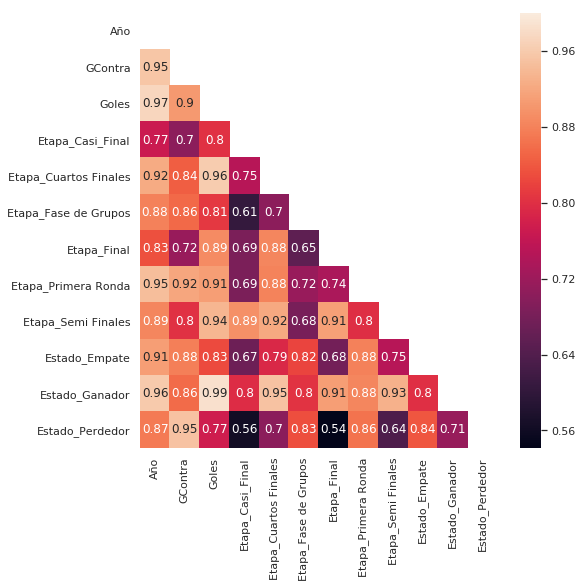

In [0]:
plt.figure(figsize=(15,15))
#sns.heatmap(gran_dataresumen.corr("pearson"), annot=True)

cups_corr = gran_dataresumen.corr()
mask = np.zeros_like(cups_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
sns.heatmap(cups_corr,
           annot=True,
           mask = mask)
plt.yticks(rotation=0) 
plt.show()

In [0]:
#cups['Winner']
#goleador_x_mundial
pais_ganador = cups.groupby(["Year"])['Winner'].sum().to_frame().sort_values(by='Year' ,ascending= False)#.head(30)
pais_ganador.columns = ["Ganador"]

goleador = goleador_x_mundial[['Year','Player Name']]
goleador.columns = ['Year',"namep"]
pais_anfitrion = cups.groupby(["Year"])['Country'].sum().to_frame().sort_values(by='Year' ,ascending= False)
pais_anfitrion.columns = ['paisA']
#df_data = pd.concat([pais_ganador,goleador,pais_anfitrion],axis=0)
#df_data.head()
# #team_name2 = matches["Away Team Name"].value_counts().reset_index()
#pais_ganador.columns = ["Year","G"]
# #team_name2
pais_g = goleador_x_mundial[['Year','Team Initials']]
pais_g.columns = ['Year','seleccion']
pais_ganador = pais_ganador.merge(goleador,left_on = 'Year',right_on = 'Year',how = 'left')
pais_ganador = pais_ganador.merge(pais_g,left_on = 'Year',right_on = 'Year',how = 'left')
pais_ganador
pais_ganador
pais_ganador = pais_ganador.merge(pais_anfitrion,left_on = 'Year',right_on = 'Year',how = 'left')
#pais_ganador['namep']= pais_ganador['seleccion']
#pais_ganador
# gran_data = pd.get_dummies(d, columns = ['Etapa', 'Estado'])
# gran_data
# a = pais_ganador.groupby("Year").sum()
# plt.figure(figsize=(15,15))
#sns.heatmap(gran_dataresumen.corr("pearson"), annot=True)

# plt.hist(pais_ganador, bins=7)
# plt.xlabel('namep')
# plt.ylabel(cups['Year'])
# plt.show()

In [0]:
# import seaborn as sns
# import matplotlib.pyplot as plt            # biblioteca "nativa" de gráficos

# fig, ax = plt.subplots(1,2,figsize=(20,7))
# mazda = pais_ganador[pais_ganador['namep']=='Winner']
# p0 = sns.heatmap(pais_ganador.corr(),annot=True,fmt='.2f', ax=ax[0])
# p1 = sns.heatmap(pais_ganador.corr(),annot=True,fmt='.2f', ax=ax[1], cmap="YlGnBu")
# _ = ax[0].set_title('Correlaciones globales')
# _ = ax[1].set_title('Correlaciones Autos MAZDA')
